## Overview

Objective:
1. Solve simple image processing & CV problems using OpenCV
2. Understand how to use OpenCV for other tasks you may want to solve in CV.
3. We will cover simple and easy to undertsand examples in this session. We will also intorduce the underlying Math wherever possible.

Pre-requisites:
1. Working Knowledge of Python.
2. Ability to read documentation and google search.

Modern Computer Vision:
1. Digital Signal Processing
2. Image Processing
3. Machine Learning
4. Deep Learning
5. Computational Photography
6. Multiview geometry

Resources:
1. OpenCV tutorials: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html
2. Good Book: http://szeliski.org/Book/
3. Good Blog: https://www.pyimagesearch.com/blog/


## Problem 1: Image Blending
Reference: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html#image-arithmetics

**bold text**



In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv  # import opencv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
# download image from the URL
!wget "https://raw.githubusercontent.com/abidrahmank/OpenCV2-Python-Tutorials/master/data/messi5.jpg" -O messi5.jpg

--2021-03-28 10:15:45--  https://raw.githubusercontent.com/abidrahmank/OpenCV2-Python-Tutorials/master/data/messi5.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72937 (71K) [image/jpeg]
Saving to: ‘messi5.jpg’

messi5.jpg          100%[===================>]  71.23K  --.-KB/s    in 0.008s  

2021-03-28 10:15:45 (8.23 MB/s) - ‘messi5.jpg’ saved [72937/72937]



In [ ]:
!ls -l


total 76
-rw-r--r-- 1 root root 72937 Mar 28 10:15 messi5.jpg
drwxr-xr-x 1 root root  4096 Mar 18 13:36 sample_data


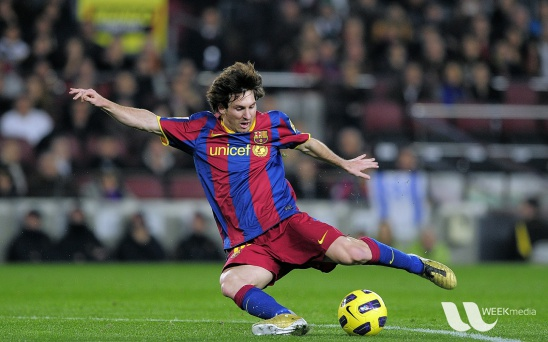

In [ ]:
img1 = cv.imread('messi5.jpg')
cv2_imshow(img1)

In [ ]:
print(img1.shape)

(342, 548, 3)


In [ ]:
print(img1[100,100])

[157 166 200]


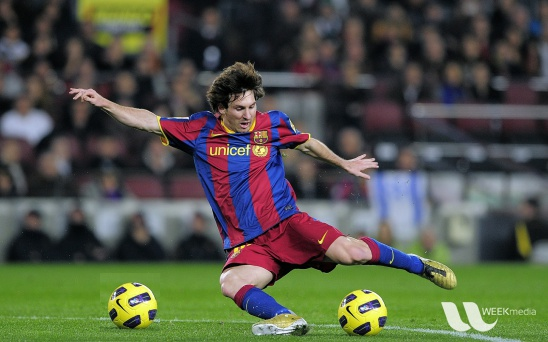

In [ ]:
# add another ball to the image
ball = img1[280:340, 330:390]
img1[273:333, 100:160] = ball

cv2_imshow(img1)

How is an image represented by a computer?
- Zoom-in till you see individual pixels
- Three Matrices of pixels for R, G and B

 <font color='lightgreen'>**IDEA: We can apply Matrix Algebra operations (addition, subtraction, multiplication) on images.**  </font>


In [ ]:
# downlaod another image opencv_logo
! wget https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/487px-OpenCV_Logo_with_text.png -O opencv_logo.png

--2021-03-28 10:21:42--  https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/487px-OpenCV_Logo_with_text.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30128 (29K) [image/png]
Saving to: ‘opencv_logo.png’

opencv_logo.png     100%[===================>]  29.42K  --.-KB/s    in 0.02s   

2021-03-28 10:21:43 (1.29 MB/s) - ‘opencv_logo.png’ saved [30128/30128]



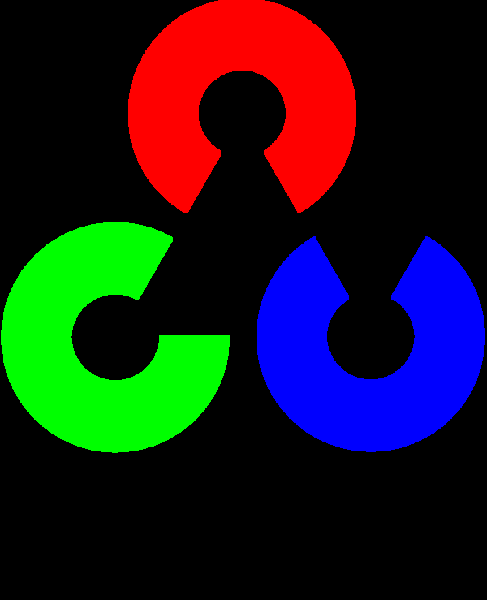

In [ ]:
img2 = cv2.imread('opencv_logo.png')
cv2_imshow(img2)

In [ ]:
print(img2.shape)

(600, 487, 3)


### Simple Math behind Image Blending:
<font color='lightgreen'> Image Blending = Weighted addition of matrices </font>

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html#image-arithmetics

In [ ]:
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

error: ignored

- Learn to read these errors carefully: The image sizes don't match.
- Fix it by resizing

(342, 548, 3)


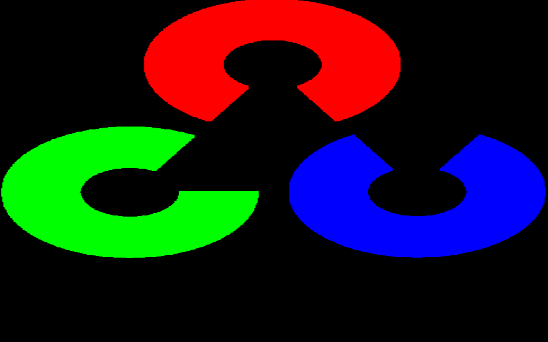

In [ ]:
img2a = cv.resize(img2, (548, 342)) # resizing opencv logo to be the same size as messi
print(img2a.shape)
cv2_imshow(img2a)

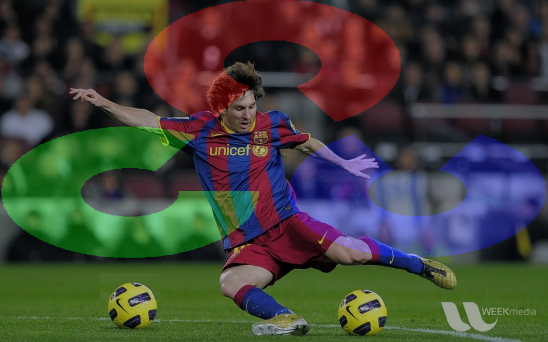

In [ ]:
# Refer to documentation: https://docs.opencv.org/master/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19
dst = cv.addWeighted(img1,0.7,img2a,0.3,0)
cv2_imshow(dst)

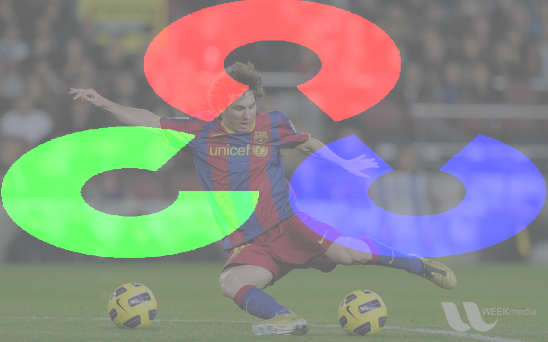

In [ ]:
dst = cv.addWeighted(img1,0.3,img2a,0.7,100)
cv2_imshow(dst)

## Problem 2: Detect new items/people in a surveillance video

- Video: Sequence of images typically at 24 FPS or 30 FPS
- Simplest wat to detect items/people: Subtraction
- More complex ML model based systems also exist

In [ ]:
! wget https://github.com/opencv/opencv/blob/master/samples/data/vtest.avi

--2021-03-28 14:29:22--  https://github.com/opencv/opencv/blob/master/samples/data/vtest.avi
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘vtest.avi.2’

vtest.avi.2             [ <=>                ] 100.90K   552KB/s    in 0.2s    

2021-03-28 14:29:22 (552 KB/s) - ‘vtest.avi.2’ saved [103321]



In [ ]:
!ls -l

total 6136
-rw-r--r-- 1 root root   72937 Mar 28 10:15 messi5.jpg
-rw-r--r-- 1 root root   32814 Aug 13  2019 opencv_logo.jpg
-rw-r--r-- 1 root root   30128 Feb 25  2016 opencv_logo.png
drwxr-xr-x 1 root root    4096 Mar 18 13:36 sample_data
-rw-r--r-- 1 root root  103316 Mar 28 11:10 vtest.avi
-rw-r--r-- 1 root root  103316 Mar 28 11:22 vtest.avi.1
-rw-r--r-- 1 root root  103321 Mar 28 14:29 vtest.avi.2
-rw-r--r-- 1 root root 5813102 Mar 28 11:46 vtest.mp4


In [ ]:
!ls -l

total 6136
-rw-r--r-- 1 root root   72937 Mar 28 10:15 messi5.jpg
-rw-r--r-- 1 root root   32814 Aug 13  2019 opencv_logo.jpg
-rw-r--r-- 1 root root   30128 Feb 25  2016 opencv_logo.png
drwxr-xr-x 1 root root    4096 Mar 18 13:36 sample_data
-rw-r--r-- 1 root root  103316 Mar 28 11:10 vtest.avi
-rw-r--r-- 1 root root  103316 Mar 28 11:22 vtest.avi.1
-rw-r--r-- 1 root root  103321 Mar 28 14:29 vtest.avi.2
-rw-r--r-- 1 root root 5813102 Mar 28 11:46 vtest.mp4


In [ ]:
# Refer: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_bg_subtraction/py_bg_subtraction.html#background-subtraction
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('vtest.avi')
print(cap)
ret, frame = cap.read()
print(ret)
print(frame.shape)
cv2_imshow(frame)

cap.release()


<VideoCapture 0x7fd08d65a9f0>
False


AttributeError: ignored

In [ ]:
# Lets use .mp4 file and see if it works.
# Converted from avi to mp4 on my laptop using: ffmpeg -i vtest.avi vtest.mp4
# Uplaoded it to Goolge Drive
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RfcoodYTKdcWbiZYmvIARpPZJansboay' -O vtest.mp4

<VideoCapture 0x7fd08d65ab10>
True
(576, 768, 3)


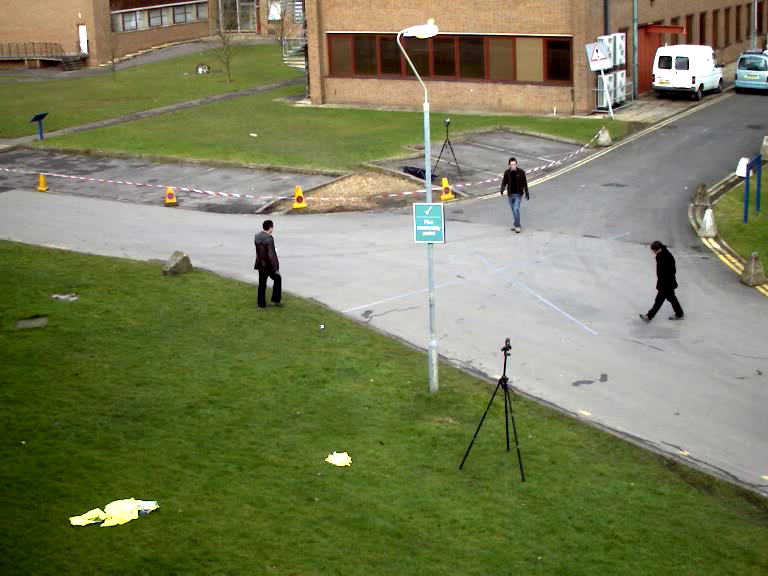

In [ ]:
# Refer: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_bg_subtraction/py_bg_subtraction.html#background-subtraction
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('vtest.mp4')
print(cap)
ret, frame = cap.read()
print(ret)
print(frame.shape)
cv2_imshow(frame)

cap.release()

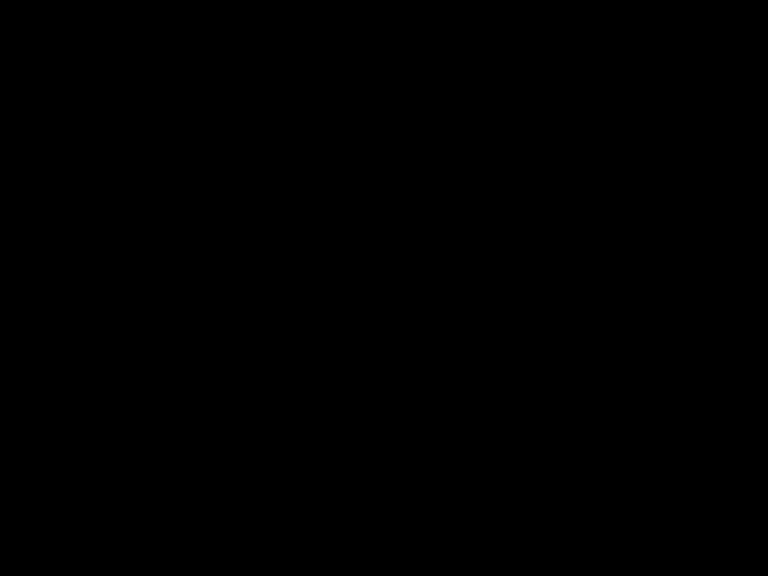

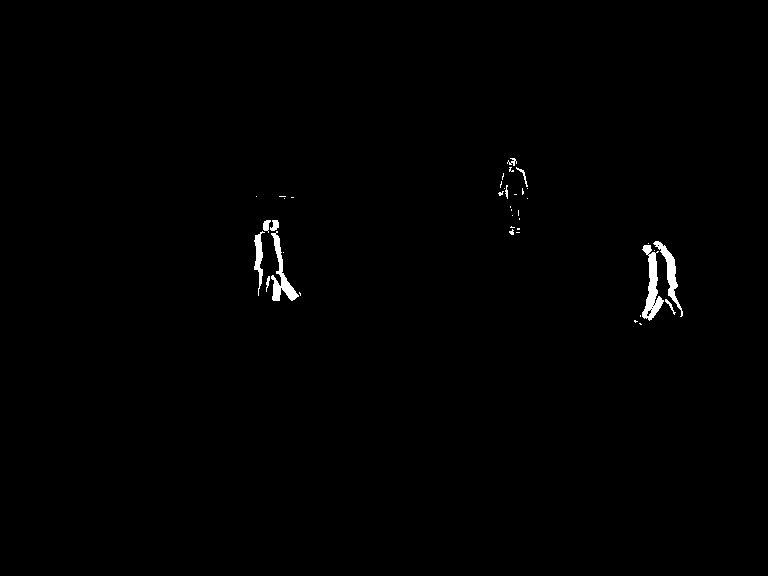

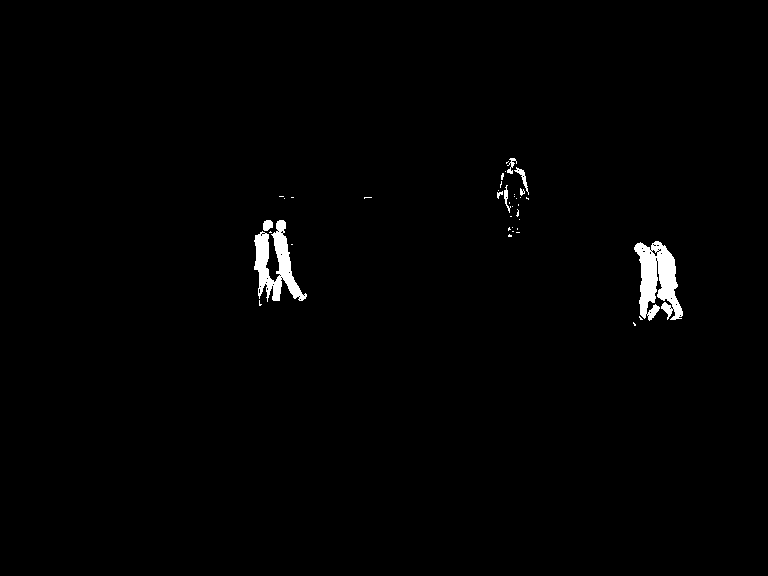

In [ ]:
# Source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_bg_subtraction/py_bg_subtraction.html#background-subtraction
import numpy as np
import cv2

cap = cv2.VideoCapture('vtest.mp4')

#Refer documentation: https://docs.opencv.org/3.4/d6/da7/classcv_1_1bgsegm_1_1BackgroundSubtractorMOG.html
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()

cnt =0

while(cnt < 3):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2_imshow(fgmask)
    cnt = cnt+1

cap.release()
cv2.destroyAllWindows()

<font color='lightgreen'>Key lesson: Most of the cutting edge CV techinques use lots of ML and DL. </font>

## Problem 3: Image Blurring using Convolution

Refer: https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html

Refer: https://en.wikipedia.org/wiki/Kernel_(image_processing)

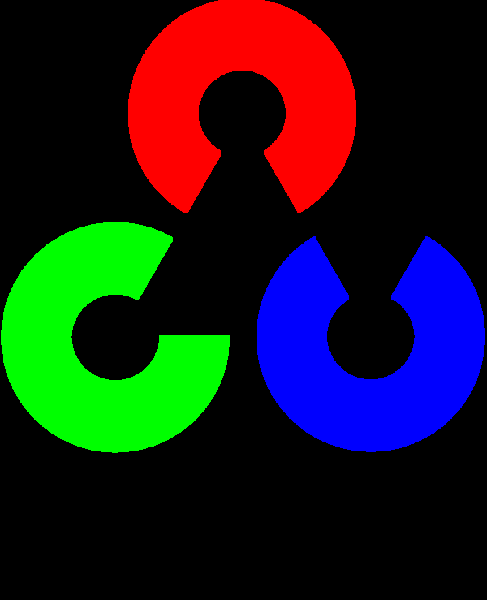

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('opencv_logo.png')
cv2_imshow(img)


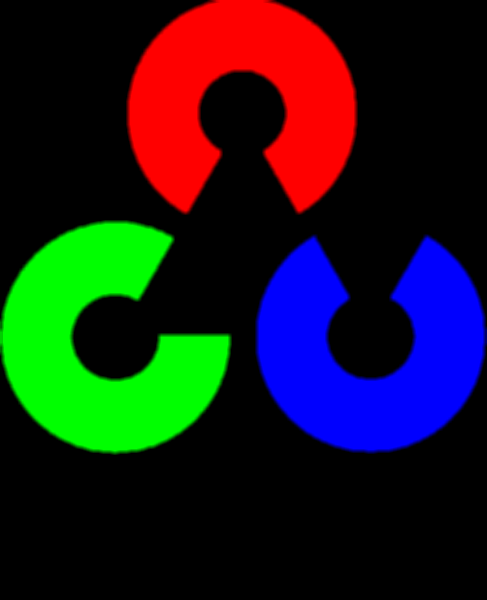

In [ ]:
kernel = np.ones((5,5),np.float32)/25 # 5x5 kernel of all 1's
dst = cv.filter2D(img,-1,kernel)
cv2_imshow(dst)

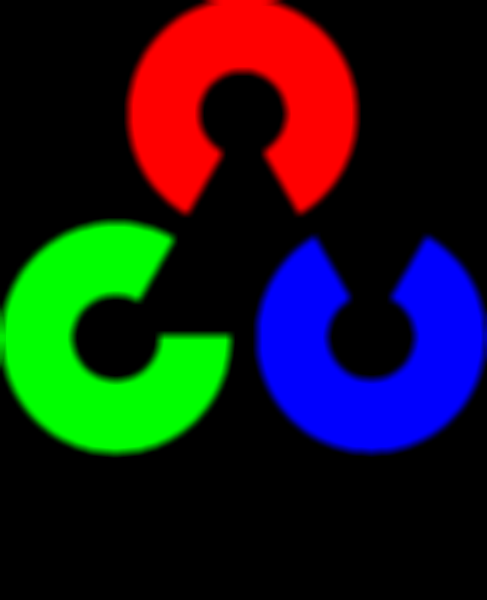

In [ ]:
kernel = np.ones((10,10),np.float32)/100 # 10x10 kernel of all 1's
dst = cv.filter2D(img,-1,kernel)
cv2_imshow(dst)

## Other operations and tasks using OpenCV
https://docs.opencv.org/master/d6/d00/tutorial_py_root.html